# K-Nearest Neighbor (k-NN) Classification

## The k-NN Classifier Algorithm

Given a trainig set $X_{train}$ with labels $y_{train}$, and given a new instance $x_{test}$ to be classified, then

1. find the $k$ most similar instances (let's call them $X_{NN}$) to $x_{test}$ that are in $X_{train}$ using e.g. eucledian **distance metric**
2. get the labels $y_{NN}$ for the instances in $X_{NN}$
3. predict the label for $x_{test}$ by combining the labels $y_{NN}$ e.g. with **simple majority vote**

## Example with SciKit-Learn

Given this [random 2-class classification data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html):

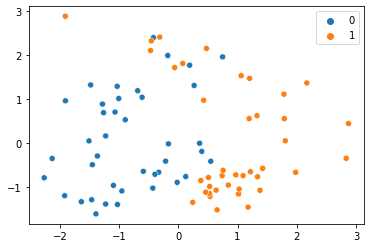

In [9]:
import numpy as np
np.random.seed(31415)
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train);

### Train the model

We train the model for different number of neighbors $k$:

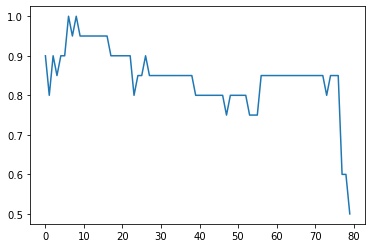

In [68]:
accuracys = []
for k in np.arange(1, len(X_train)+1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracys.append(model.score(X_test, y_test))

plt.plot(accuracys);

best accuracy is for $k=10$

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



### Plotting the Decision Boundary

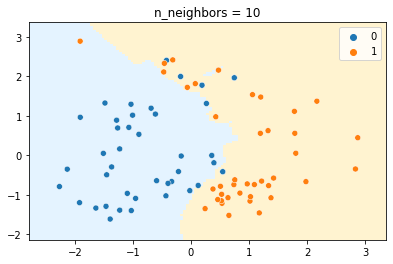

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def plot_knn_decision_boundary(model, X, y):
    cmap = ListedColormap(['#74c1ff30', '#ffc10730'])
    mesh_step_size = 0.05
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6.4, 4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap, shading='auto')
    sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train);
    plt.title("n_neighbors = {}".format(model.n_neighbors))
    plt.show()

plot_knn_decision_boundary(model, X_train, y_train);

# K-Means Clustering

# TEMP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)

In [3]:
raw_data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


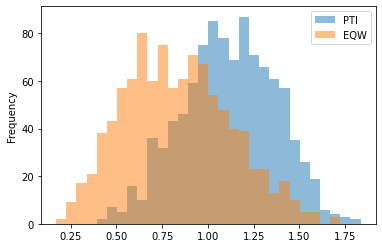

In [4]:
raw_data.iloc[: ,1:3].plot.hist(bins=30, alpha=0.5);

In [5]:
raw_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

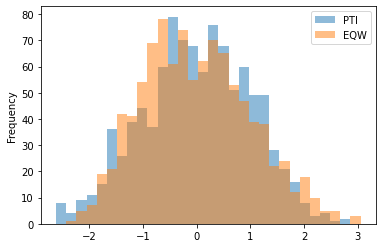

In [7]:
scaled_data.iloc[: ,1:3].plot.hist(bins=30, alpha=0.5);

In [8]:
from sklearn.model_selection import train_test_split
x = scaled_data
y = raw_data['TARGET CLASS']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       152
           1       0.93      0.93      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data, predictions))

[[141  11]
 [ 11 137]]


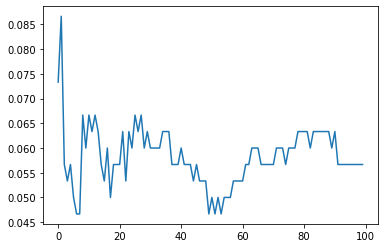

In [12]:
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)b
    error_rates.append(np.mean(new_predictions != y_test_data))

plt.plot(error_rates);

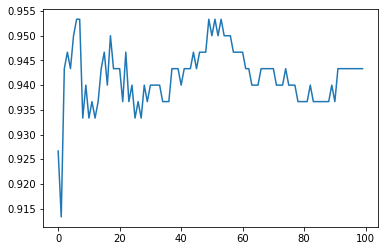

In [13]:
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    error_rates.append(new_model.score(x_test_data, y_test_data))

plt.plot(error_rates);

In [86]:
raw_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


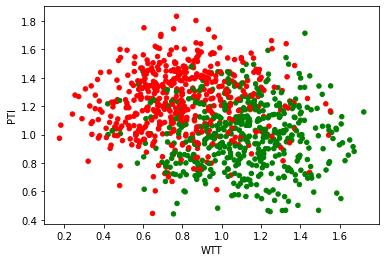

In [115]:
col = lambda c: 'red' if c == 0 else 'green'
raw_data.plot.scatter(x='WTT', y='PTI', c=raw_data['TARGET CLASS'].apply(col));

# TEMP 2

In [117]:
%%writefile knn_data.csv
1,4,0
2,1,0
6,2,1
6,5,1

Writing knn_data.csv


In [123]:
data = pd.read_csv('knn_data.csv', names=['x1', 'x2', 'y'])
data

,x1,x2,y
0,1,4,0
1,2,1,0
2,6,2,1
3,6,5,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [ ]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 5 nearest neighbors
